# GW likelihood DEMO

This notebook shows an example of how to use and combine the likelihoods available.

**Warning:** in order to use this notebook you need to download our simulated data from **_Insert link to data here_**

In [27]:
import numpy   as np
import pandas  as pd
import seaborn as sb

from copy      import deepcopy
from itertools import product
from bios      import read
from tqdm      import tqdm

from cobaya.model import get_model

from theory_code.distance_theory import TheoryCalcs

#Plotting
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})

sidelegend = {'bbox_to_anchor': (1.04,0.5), 
              'loc': "center left",
              'frameon': False}
bottomlegend = {'bbox_to_anchor': (0.35,-0.2), 
                'loc': "center left",
                'frameon': False,
                'ncols': 3}

# Fiducial and testing options

We fix here some of the settings used to visualize the results of the likelihood model

- fiducial: value of the cosmological parameter
- varpar: parameter over which to run the likelihood

In [53]:
fiducial = {'omegam': 0.334,
            'H0': 73.6,
            'epsilon0_GW': 0.0,}

varpar = {'name': 'H0',
          'latex': r'$H_0$',
          'min': 60.0,
          'max': 82.0, 
          'N': 100}

# Run options

Here we see the different options that need to be set to make the likelihood function.

We see them here as separate, but when running a full sampling, these are handled all together by the `runner.py` script.

In [29]:
info = {}

## Likelihood settings

Here we list the settings required by the GW likelihood:

- `path`: the path to the GW dataset to be used


In [30]:
from likelihood.handler import LikelihoodHandler

like = {'GW_data': {'path': 'mock_data/data/GWmock_LCDM',}}

LikeSets = LikelihoodHandler(like)
info['likelihood'] = LikeSets.like_dict
print(info['likelihood'])


LOADING GW DATA

{'path': 'mock_data/data/GWmock_LCDM'}
{'GWlike': {'external': <class 'likelihood.GW_likelihood.GWLike'>, 'GW_data_path': 'mock_data/data/GWmock_LCDM'}}


## Theory settings

In order to work, the likelihood needs

In [31]:
from theory_code.handler import TheoryHandler

theory = {'cosmology': 'Standard',
          'fiducial_path': None,
          'DDR_options': {'eta_model': 'polynomial',
                          'use_pade': False,}}

info['theory'] = TheoryHandler(theory).theory_dict

## Parameter settings

When launching the likelihood, we need to know which parameters are free to vary and which we are fixed. We load this information from one of the DDR settings files, a $\aLambd$CDM parameterization

In [32]:
preinfo = read('settings/DDR/DDR_GW.yaml')

info['params'] = preinfo['params']
print(info['params'])

{'omegam': {'latex': '\\Omega_\\mathrm{m}', 'prior': {'min': 0.001, 'max': 0.99}, 'proposal': 0.05, 'ref': {'dist': 'norm', 'loc': 0.3, 'scale': 0.01}, 'drop': True}, 'omch2': {'value': 'lambda omegam, ombh2, omnuh2, H0: omegam*(H0/100)**2-ombh2-omnuh2', 'latex': '\\Omega_\\mathrm{c} h^2'}, 'ombh2': 0.02218, 'H0': {'latex': 'H_0', 'prior': {'max': 100.0, 'min': 20.0}, 'proposal': 0.5, 'ref': {'dist': 'norm', 'loc': 67.0, 'scale': 0.5}}, 'MB': -19.2435, 'omk': 0.0, 'w': -1.0, 'wa': 0.0, 'omnuh2': 0.0006442, 'nnu': 3, 'a_EM': 1, 'n_EM': 1, 'epsilon0_EM': 0.0, 'a_GW': 1, 'n_GW': 1, 'epsilon0_GW': {'prior': {'min': -0.5, 'max': 0.5}, 'ref': {'dist': 'norm', 'loc': 0.0, 'scale': 0.1}, 'latex': '\\epsilon_0^\\mathrm{GW}'}, 'rdrag': {'latex': 'r_\\mathrm{d}', 'derived': True}, 'omegaL': {'latex': '\\Omega_\\Lambda', 'derived': True}}


# Exploring the likelihood

We exploit the Cobaya class `get_model` to access the calculations of the likelihood module.

This is not the pipeline used when doing actual runs, but it allows us to look at the different parts of the likelihood

In [35]:
model = get_model(info)

With the get_model instruction applied, we can now access information concerning the likelihood and the running settings, e.g. the sets of free or derived parameters

In [36]:
free_params    = model.parameterization.sampled_params()
derived_params = model.parameterization.derived_params()
print('Free: ',free_params)
print('Derived: ',derived_params)

Free:  {'omegam': nan, 'H0': nan, 'epsilon0_GW': nan}
Derived:  {'omch2': nan, 'rdrag': nan, 'omegaL': nan}


## Fiducial calculations

We can make the code run end-to-end at a specific point, e.g. the fiducial, to compute the value of the posterior and even accessing the theoretical calculations for that point

In [37]:
logpost_fid = model.logposterior(fiducial)
print(logpost_fid)

LogPosterior(logpost=-1592.8753317024468, logpriors=[-4.370965687314456], loglikes=array([-1588.50436602]), derived=[0.158102264, 138.4785234999209, 0.6659337751501886], finite=False)


## Visualize data and theory

We can retrieve both the data and the theory used in the calculations

In [45]:
dataset = model.likelihood['GWlike'].dataset_GW
covmat  = np.linalg.inv(model.likelihood['GWlike'].invcovmat)

dataset['err'] = np.sqrt(np.diag(covmat))
dataset = dataset.sort_values(by='z')

print(dataset)

             z  dL_noiseless        err_dL  theta_jn            dL  \
1353  0.066632    285.778378      2.309118  0.363410    287.636426   
2528  0.099940    438.471082      6.370852  0.144198    432.887486   
46    0.115920    513.940812      4.036630  0.165611    525.185303   
3040  0.131790    590.303608      5.393337  0.033688    585.646576   
921   0.142327    641.757107      8.946054  0.239590    639.366944   
...        ...           ...           ...       ...           ...   
2668  3.511943  29066.942939  11705.162682  0.109192  34368.775135   
587   3.686411  30794.666623  12813.197931  0.151316  22053.683688   
1204  3.711459  31043.685298  13145.571421  0.162323  41637.951796   
2654  3.759342  31520.379628  13582.461466  0.068586  24696.509759   
228   3.776362  31690.021550  13687.071326  0.080726  30797.942046   

               err  
1353      2.309118  
2528      6.370852  
46        4.036630  
3040      5.393337  
921       8.946054  
...            ...  
2668  11705.

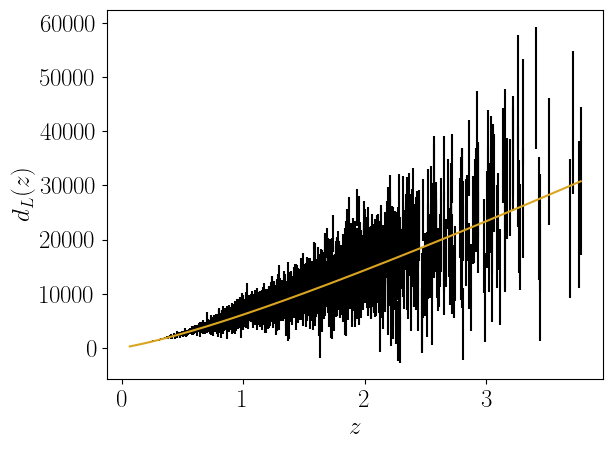

In [50]:
plt.figure()
plt.errorbar(dataset['z'],dataset['dL'],yerr=dataset['err_dL'],color='black',ls='')
plt.plot(dataset['z'],model.provider.get_result('DL_GW')(dataset['z']),color='goldenrod',linewidth=1.5)
plt.xlabel(r'$z$')
plt.ylabel(r'$d_L(z)$');

## Computing the posterior on a grid

As a quick check, we can sample the posterior over a grid for a single parameter (the varpar variable chosen at the beginning), while keeping all others fixed at their fiducial values.

In [54]:
par_vals = np.linspace(varpar['min'],varpar['max'],varpar['N'])

chi2s = [pd.DataFrame({varpar['name']: fiducial[varpar['name']],
                       'chi2': -2*logpost_fid.logpost},index=[0])]
for val in tqdm(par_vals):
    varpoint = deepcopy(fiducial)
    varpoint[varpar['name']] = val
    logpost = model.logposterior(varpoint)
    chi2s.append(pd.DataFrame({varpar['name']: val,
                               'chi2': -2*logpost.logpost},index=[0]))

chi2 = pd.concat(chi2s,ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.56it/s]


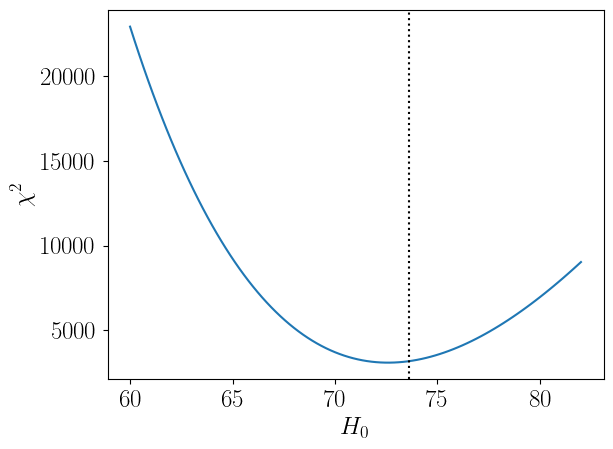

In [55]:
plt.figure()
sb.lineplot(chi2,x=varpar['name'],y='chi2')
plt.axvline(x=fiducial[varpar['name']],ls=':',color='black')
plt.xlabel(varpar['latex'])
plt.ylabel(r'$\chi^2$');

# Sampling the posterior

Up to this point, we gave the code no instructions on how to sample the parameter space and reconstruct the posterior, except for when we computed it on a grid.

Below, we see how the sampling work, also making some example on the usage of the SN calibration option.

**WARNING: running this part of the notebook might require some time**

## Sampling settings

This code has a working interface with Cobaya, and therefore it can use all the samplers available for that code. In addition to this, it is also possible to use nested sampling through the Nautilus sampler.

The code requires information on the sampler to be provided with a dictionary with entries:
- `name`: specifying the sampler to be used (`mcmc`, `minimize`, `evaluate`, `nautilus`). The first three coincide with the samplers used by Cobaya, while the latter allows to switch to Nautilus;
- `options`: a dictionary containing the options suitable for the chosen sampler. Notice that, in case Nautilus is chosen, two sets of options are easily available in the code. Choosing `option`: `poor` runs Nautilus with options suitable for a quick test, while `options`: `good` runs it with more precise settings

In [56]:
from samplers.handler import SamplingHandler

### Example 1: minimization

With these settings, the code searches for the peak of the posterior using Cobaya

In [57]:
sampinfo = {'sampler': {'name': 'minimize',
                        'options': None}}

sampler = SamplingHandler(sampinfo)
info['sampler'] = sampler.sampling_dictionary

Running with Metropolis-Hastings


In [58]:
updated_info,minimum = sampler.run(info)

[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'omegam': 0.2864413402853132, 'H0': 66.83841398880756, 'epsilon0_GW': 0.11877374201877511}
[minimize] Run 2/2 will start from random initial point:
[minimize] {'omegam': 0.3190405772656126, 'H0': 67.737799265356, 'epsilon0_GW': -0.057457889789501275}
[minimize] Starting run 1/2
[minimize] Run 1/2 converged.
[minimize] Starting run 2/2
[minimize] Run 2/2 converged.
[minimize] Finished successfully!
[minimize] *WARNING* Big spread in minima: [1548.9668185216017, 1545.6049661037162]
[minimize] -log(posterior) minimized to 1545.6
[minimize] Parameter values at minimum:
   weight  minuslogpost    omegam         H0  epsilon0_GW    omch2       rdrag   omegaL  minuslogprior  minuslogprior__0         chi2  chi2__GWlike
0     1.0   1545.604966  0.298693  73.043726    -0.012248  0.13654  143.359926  0.70124       4.370966          4.370966  3082.468001   3082.468001
[minimize] Full set of minima:
{'0': (1

### Example 2: nested sampling

with these settings we reconstruct the posterior

In [59]:
sampinfo = {'sampler': {'name': 'nautilus',
                        'options': 'poor'}}

sampler = SamplingHandler(sampinfo)
info['sampler'] = sampler.sampling_dictionary

Running with Nautilus


In [61]:
chain,nautilus_dict = sampler.run(info)


RUNNING WITH NAUTILUS SAMPLER

Loading model wrapper of Cobaya
[model] *WARNING* Ignored blocks/options: ['sampler']
model loaded
Preparing the prior...
Loaded prior into Nautilus with dimension 3
Prior keys:  ['omegam', 'H0', 'epsilon0_GW']
Starting to sample with Nautilus...
Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
Finished  | 22     | 1        | 2        | 18304    | N/A    | 10065 | -1552.25 
NAUTILUS SAMPLING FINISHED


### Plotting

Below a simple function to analyze the output of the tests above. A more sophisticated class to analyze data is available, still linked to getdist, but for a description of that see **_ADD DEMO PLOTTING_**

In [62]:
from getdist import MCSamples,plots

def get_sample(chain,params):

    sample = MCSamples(samples=chain[list(params.keys())].values,names=list(params.keys()),labels=list(params.values()))
    
    return sample

In [63]:
ET_sample = get_sample(chain,nautilus_dict)

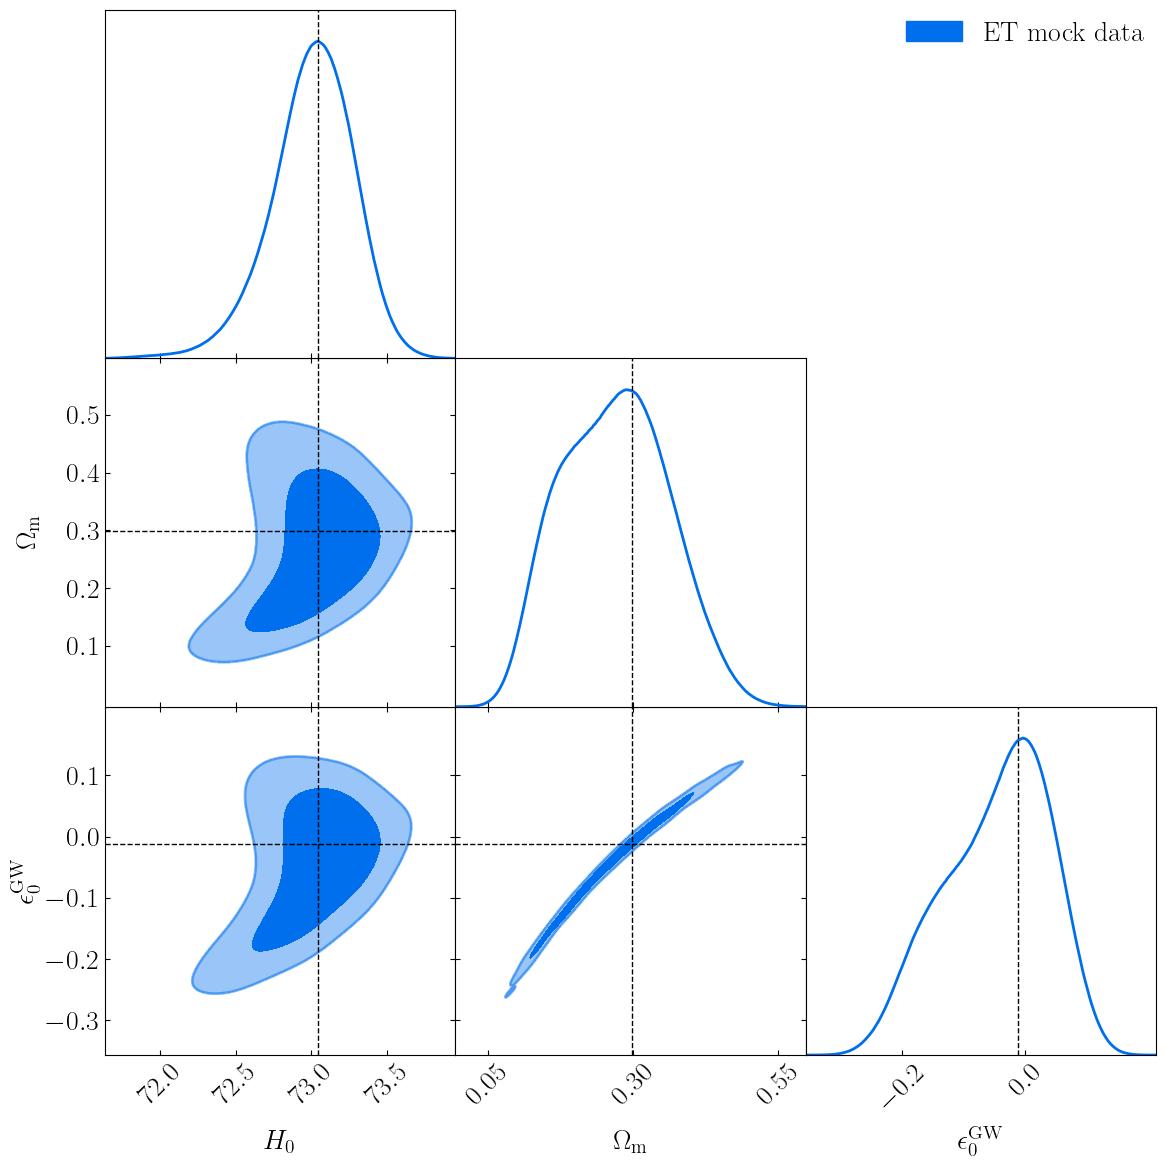

In [65]:
params = ['H0', 'omegam','epsilon0_GW']  

g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=20
g.settings.axes_labelsize=20
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1
g.settings.axis_tick_x_rotation = 45
g.triangle_plot([ET_sample], params,
    filled=True,
    legend_loc='upper right',
    legend_labels=['ET mock data'],
    contour_lws=2,
    markers={par: minimum.minimum[par] for par in params})
g.fig.align_ylabels()
g.fig.align_xlabels();